In [328]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [329]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [330]:
!ls "/content/drive/My Drive"

'Colab Notebooks'  'Fixed Resume.pdf'  'M.Tech DA'


In [331]:
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Assignment3.csv')

In [332]:
data

,x1,x2,x3,x4,x5,y
0,7.11,-447.71,135.66,92.41,96.04,9131.40
1,7.06,-455.33,94.49,91.76,92.16,9001.86
2,6.89,-466.86,186.25,89.54,100.00,8595.85
3,7.25,-440.53,176.83,94.24,84.64,9469.94
4,7.24,-445.92,185.90,94.11,88.36,9448.98
...,...,...,...,...,...,...
96,7.86,479.03,187.04,102.18,88.36,11168.68
97,8.37,489.50,159.51,108.85,81.00,12605.81
98,8.32,496.95,17.12,108.16,92.16,12467.96
99,8.37,546.88,104.18,108.83,100.00,12631.05


Statistics of the data

In [333]:
data.describe()

,x1,x2,x3,x4,x5,y
count,101.00,101.00,101.00,101.00,101.00,101.00
mean,7.55,23.76,111.37,98.13,34.00,10244.46
std,0.38,292.85,55.81,4.94,30.56,1022.77
min,6.68,-466.86,9.80,86.83,0.00,8062.54
25%,7.25,-208.89,66.38,94.24,6.76,9469.94
50%,7.53,38.95,104.18,97.90,25.00,10187.66
75%,7.80,262.92,168.16,101.42,57.76,10866.63
max,8.37,546.88,195.81,108.85,100.00,12631.05


Check for any null values

In [334]:
data.isna().sum()

,0
x1,0
x2,0
x3,0
x4,0
x5,0
y,0


Visualization of the relationsip of the features using pairplot

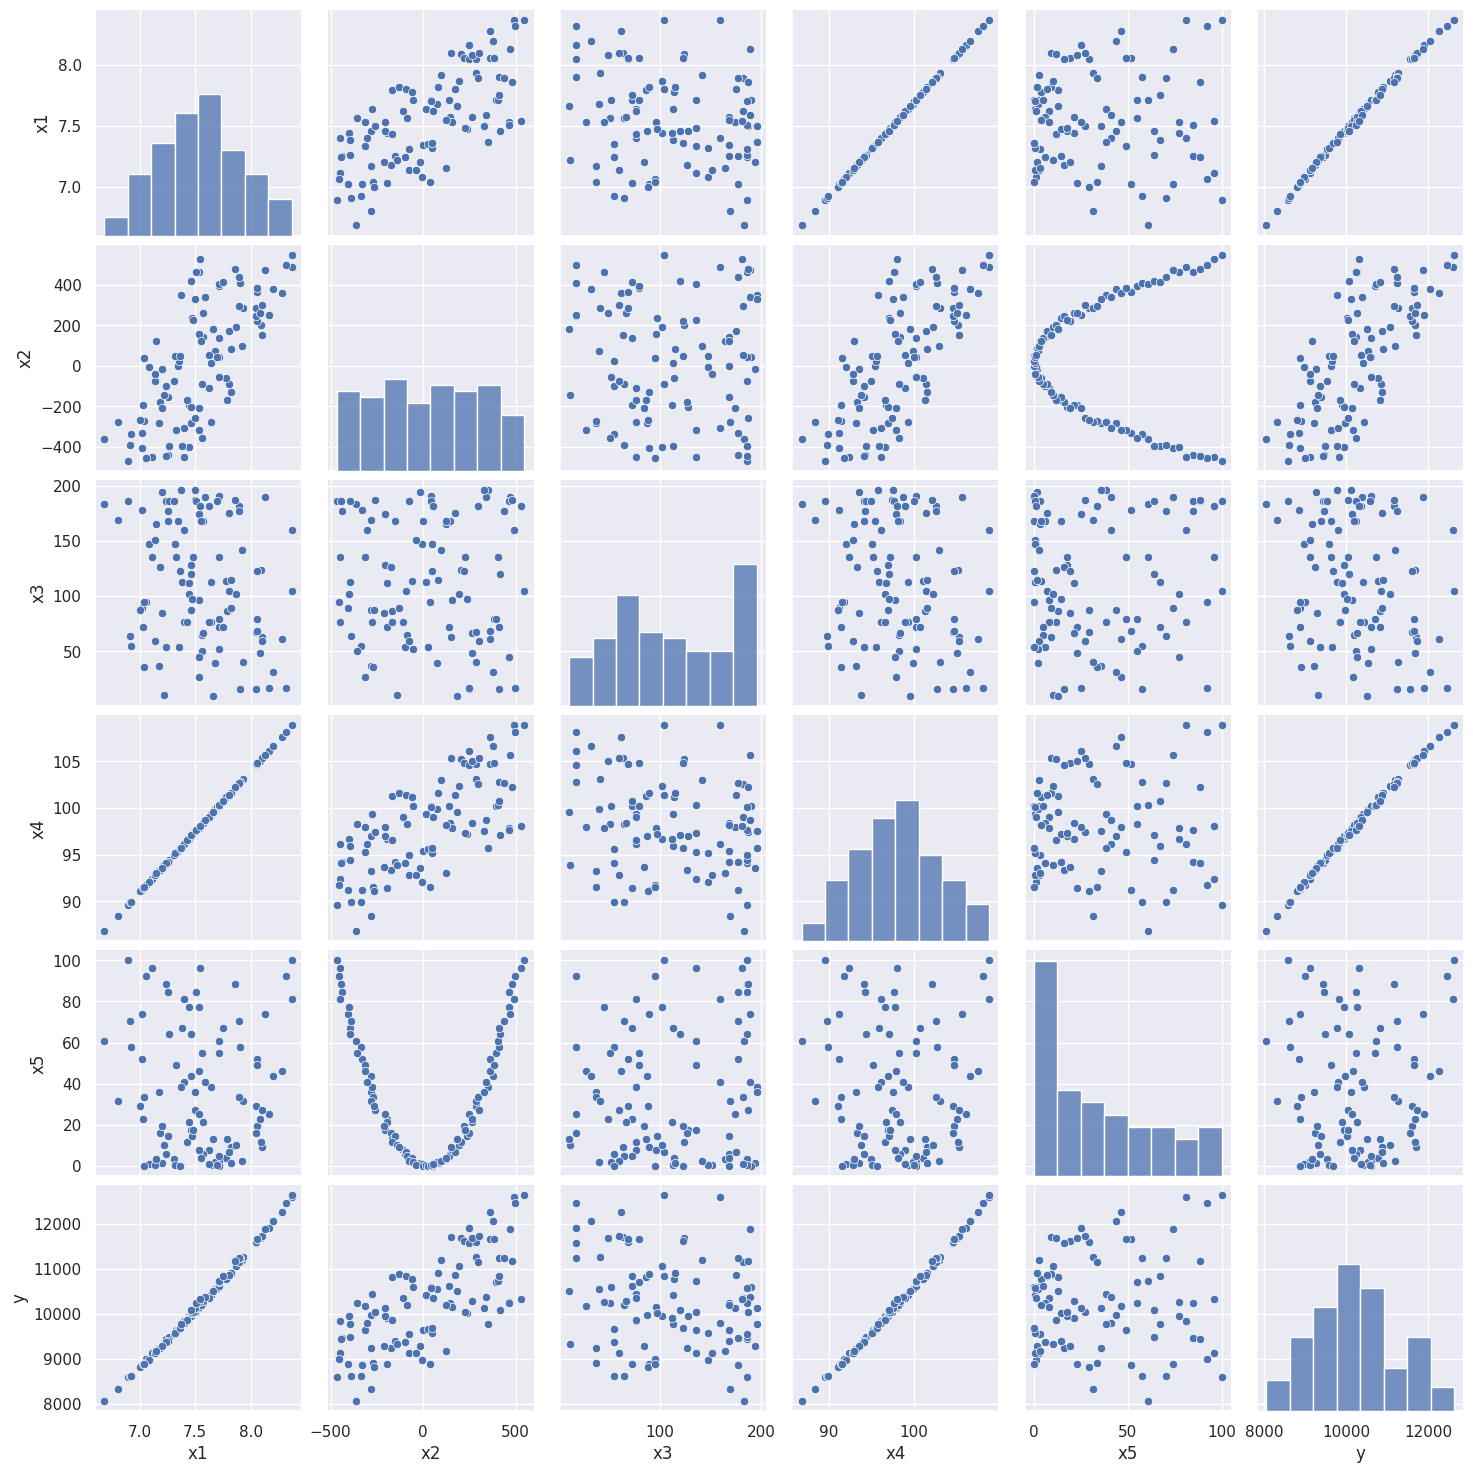

In [335]:
import seaborn as sns

sns.pairplot(data)

**Observations 1:**
1. As we can observe from the pairplot that only features x1 and features x4 are having linear relationship with dependent features.
2. Feature x2, feature x3 and feature x5 not have linear relationship with the dependent features.



# Task 1
Fit OLS on the data directly and evaluate the baseline SSE loss. You will observe that the loss is very high, but that’s ok. You will strive hard to apply creative ways to reduce the loss.

In [336]:
# separating the dependent and independent features
y=data['y']    # independent features
X=data.drop(columns=['y'])  # independent features

In [337]:
y    # dependent feature

,y
0,9131.40
1,9001.86
2,8595.85
3,9469.94
4,9448.98
...,...
96,11168.68
97,12605.81
98,12467.96
99,12631.05


In [338]:
X  #  independent features

,x1,x2,x3,x4,x5
0,7.11,-447.71,135.66,92.41,96.04
1,7.06,-455.33,94.49,91.76,92.16
2,6.89,-466.86,186.25,89.54,100.00
3,7.25,-440.53,176.83,94.24,84.64
4,7.24,-445.92,185.90,94.11,88.36
...,...,...,...,...,...
96,7.86,479.03,187.04,102.18,88.36
97,8.37,489.50,159.51,108.85,81.00
98,8.32,496.95,17.12,108.16,92.16
99,8.37,546.88,104.18,108.83,100.00


In [339]:
import statsmodels.api as sm

Model Summary

In [340]:
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.763e+04
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          1.47e-148
Time:                        10:15:01   Log-Likelihood:                -474.98
No. Observations:                 101   AIC:                             962.0
Df Residuals:                      95   BIC:                             977.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9655.3103     83.303   -115.906      0.0

Here R squared and adjusted R squared are same.

Can we have the same Rsquared and AdjRsquared ?
  * Yes,it can be same in two case:
  1. Single predictor: When there is only one independent variable. the R squared and adjusted R square will be the same because the adjustment factor for k becomes negligible.
  2. Perfect fit: If the model perfectly predicts the dependent variable(R squared=1),the R squared and adjusted R squared will be same.

Sum of squared Errors(SSE) and Root Mean Squared Error(RMSE)



In [341]:
predictions=model.predict(X)
residuals=y-predictions
## SSE
sse1=np.sum(residuals**2)
rmse1=np.sqrt(sse1/101)
print("Sum of Squared Errors(SSE):",sse1)
print("Root Mean Squared Error(RMSE):",rmse1)

Sum of Squared Errors(SSE): 71877.84134016861
Root Mean Squared Error(RMSE): 26.67698999975848


# Task 2
Perform EDA on the dataset to understand the predictor features and how are they influencing each other. Also, study how each individual predictor influence the output variable. You may use correlation study to estimate the influence. Add necessary visualization and its representive interpretations to substantiate your inferences. The outcome of this step is figure out the requires features and their respective transformation.

Statistics of the features and outputs

In [342]:
# description of the data in a DataFrame. The description includes summary statistics for each numerical column in the DataFrame,
# such as the number of non-empty values, the mean, the standard deviation, the minimum and maximum values, and the percentiles
data.describe()

,x1,x2,x3,x4,x5,y
count,101.00,101.00,101.00,101.00,101.00,101.00
mean,7.55,23.76,111.37,98.13,34.00,10244.46
std,0.38,292.85,55.81,4.94,30.56,1022.77
min,6.68,-466.86,9.80,86.83,0.00,8062.54
25%,7.25,-208.89,66.38,94.24,6.76,9469.94
50%,7.53,38.95,104.18,97.90,25.00,10187.66
75%,7.80,262.92,168.16,101.42,57.76,10866.63
max,8.37,546.88,195.81,108.85,100.00,12631.05


Check for any null values

In [343]:
data.isna().sum()

,0
x1,0
x2,0
x3,0
x4,0
x5,0
y,0


From above two(.describe() and .isna().sum()) observations we can see that there is no null values in the dataset

Bivariate Analysis Using Correlation Matrix

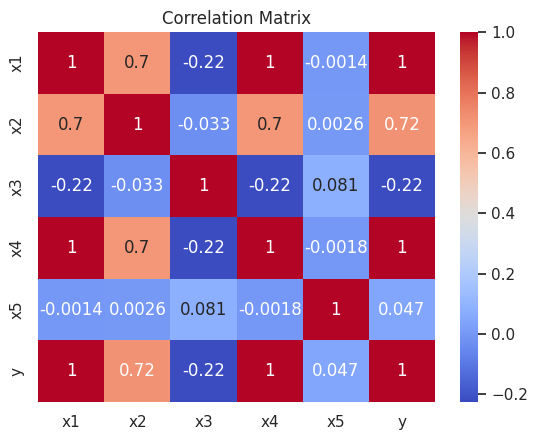

In [344]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Observations 2:**
1. Features 1 and feature 4 is highly positive correlated , so we can drop one feature among feautre 1 and feature 4.
2. Features 3 and feature 5 is highly positive correlated , so we can drop one feature among feautre 3 and feature 5.
3. Independent feature1(x1) and dependent feature y, independent feature 4 and dependent feature y is highly positive correlated.
4. Independent feature(x2 and x5) and y is positively correlated.
5. Independent feature(x3) and dependent feature y is negatively correlated.

In [345]:
# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

vif=pd.DataFrame()
vif['Variables']=X.columns
vif['vif']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif

,Variables,vif
0,const,926.34
1,x1,25163.01
2,x2,2.16
3,x3,1.15
4,x4,25256.36
5,x5,1.01


Variance Inflation Factor(VIF):
* It measures how much the variance of a regression coefficient is inflated due to multicollinearity with other variables.
* VIF=1/(1-R**2) , where R**2 is used to calculate the accuracy of the model.
* VIF=1 No multicollinearity(the variables is not correlated with other predictors)
* 1<VIF<5: Moderate correlation.
* VIF>=5 Indicates problematic multicollinearity.
* VIF>=10 String multicollinearity,seen as a serious issues.

**Observations 3:**
1.  We can see that variables x1 and variable x4 are highly correlated.The same oblervation we have seen using the correlation matrix.
2.  We will remove the features const and feature x1.

In [346]:
X=X.drop(columns=['x1','const'])
X

,x2,x3,x4,x5
0,-447.71,135.66,92.41,96.04
1,-455.33,94.49,91.76,92.16
2,-466.86,186.25,89.54,100.00
3,-440.53,176.83,94.24,84.64
4,-445.92,185.90,94.11,88.36
...,...,...,...,...
96,479.03,187.04,102.18,88.36
97,489.50,159.51,108.85,81.00
98,496.95,17.12,108.16,92.16
99,546.88,104.18,108.83,100.00


Let's see the Correlation Matrix after removing the features x1 from the dataset.

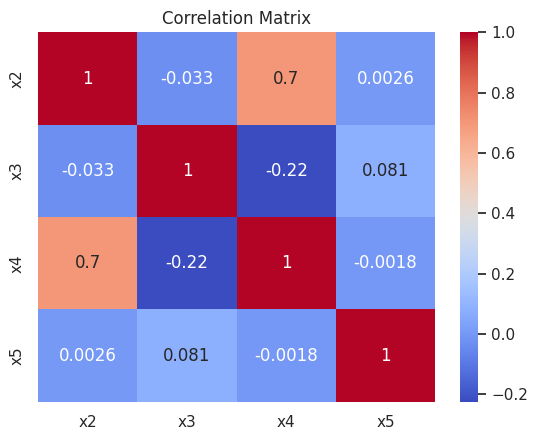

In [347]:
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Variance Inflation factor

In [348]:
# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

vif=pd.DataFrame()
vif['Variables']=X.columns
vif['vif']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif

,Variables,vif
0,x2,1.02
1,x3,4.85
2,x4,5.74
3,x5,2.27


**Observations 4:**
1. We can observe from **correlation matrix** and **variance inflation factor** that there is **no independent features** which are **highly correlated.**

**Conclusion of EDA**
1. From **observation 1** we have observed that feature x2 , feature x3 and feature x5 not have any linear realtionship with the dependent features.
2. So, we add some feature which are having polynomial degree(degree=2) consist of feature x2 ,feature x3 and feature x5.

Adding some extra features

In [349]:
X['x6']=X['x2']*X['x5']
X['x7']=X['x2']*X['x4']
X['x8']=X['x2']*X['x3']
X['x9']=X['x3']*X['x4']
X['x10']=X['x3']*X['x5']
X['x11']=X['x4']*X['x5']
X['x12']=X['x2']*X['x2']
X['x13']=X['x3']*X['x3']
X['x14']=X['x5']*X['x5']
X

,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
0,-447.71,135.66,92.41,96.04,-42998.07,-41372.88,-60736.34,12536.34,13028.79,8875.06,200444.24,18403.64,9223.68
1,-455.33,94.49,91.76,92.16,-41963.21,-41781.08,-43024.13,8670.40,8708.20,8456.60,207325.41,8928.36,8493.47
2,-466.86,186.25,89.54,100.00,-46686.00,-41802.64,-86952.68,16676.83,18625.00,8954.00,217958.26,34689.06,10000.00
3,-440.53,176.83,94.24,84.64,-37286.46,-41515.55,-77898.92,16664.46,14966.89,7976.47,194066.68,31268.85,7163.93
4,-445.92,185.90,94.11,88.36,-39401.49,-41965.53,-82896.53,17495.05,16426.12,8315.56,198844.65,34558.81,7807.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,479.03,187.04,102.18,88.36,42327.09,48947.29,89597.77,19111.75,16526.85,9028.62,229469.74,34983.96,7807.49
97,489.50,159.51,108.85,81.00,39649.50,53282.07,78080.14,17362.66,12920.31,8816.85,239610.25,25443.44,6561.00
98,496.95,17.12,108.16,92.16,45798.91,53750.11,8507.78,1851.70,1577.78,9968.03,246959.30,293.09,8493.47
99,546.88,104.18,108.83,100.00,54688.00,59516.95,56973.96,11337.91,10418.00,10883.00,299077.73,10853.47,10000.00


# Task 3
Fit OLS on the selected and transformed features and check if the loss has reduced from the baseline estimation.

In [350]:
X['y']=y
X

,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,y
0,-447.71,135.66,92.41,96.04,-42998.07,-41372.88,-60736.34,12536.34,13028.79,8875.06,200444.24,18403.64,9223.68,9131.40
1,-455.33,94.49,91.76,92.16,-41963.21,-41781.08,-43024.13,8670.40,8708.20,8456.60,207325.41,8928.36,8493.47,9001.86
2,-466.86,186.25,89.54,100.00,-46686.00,-41802.64,-86952.68,16676.83,18625.00,8954.00,217958.26,34689.06,10000.00,8595.85
3,-440.53,176.83,94.24,84.64,-37286.46,-41515.55,-77898.92,16664.46,14966.89,7976.47,194066.68,31268.85,7163.93,9469.94
4,-445.92,185.90,94.11,88.36,-39401.49,-41965.53,-82896.53,17495.05,16426.12,8315.56,198844.65,34558.81,7807.49,9448.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,479.03,187.04,102.18,88.36,42327.09,48947.29,89597.77,19111.75,16526.85,9028.62,229469.74,34983.96,7807.49,11168.68
97,489.50,159.51,108.85,81.00,39649.50,53282.07,78080.14,17362.66,12920.31,8816.85,239610.25,25443.44,6561.00,12605.81
98,496.95,17.12,108.16,92.16,45798.91,53750.11,8507.78,1851.70,1577.78,9968.03,246959.30,293.09,8493.47,12467.96
99,546.88,104.18,108.83,100.00,54688.00,59516.95,56973.96,11337.91,10418.00,10883.00,299077.73,10853.47,10000.00,12631.05


Visualization of the relationship of the dataset using pairplot.

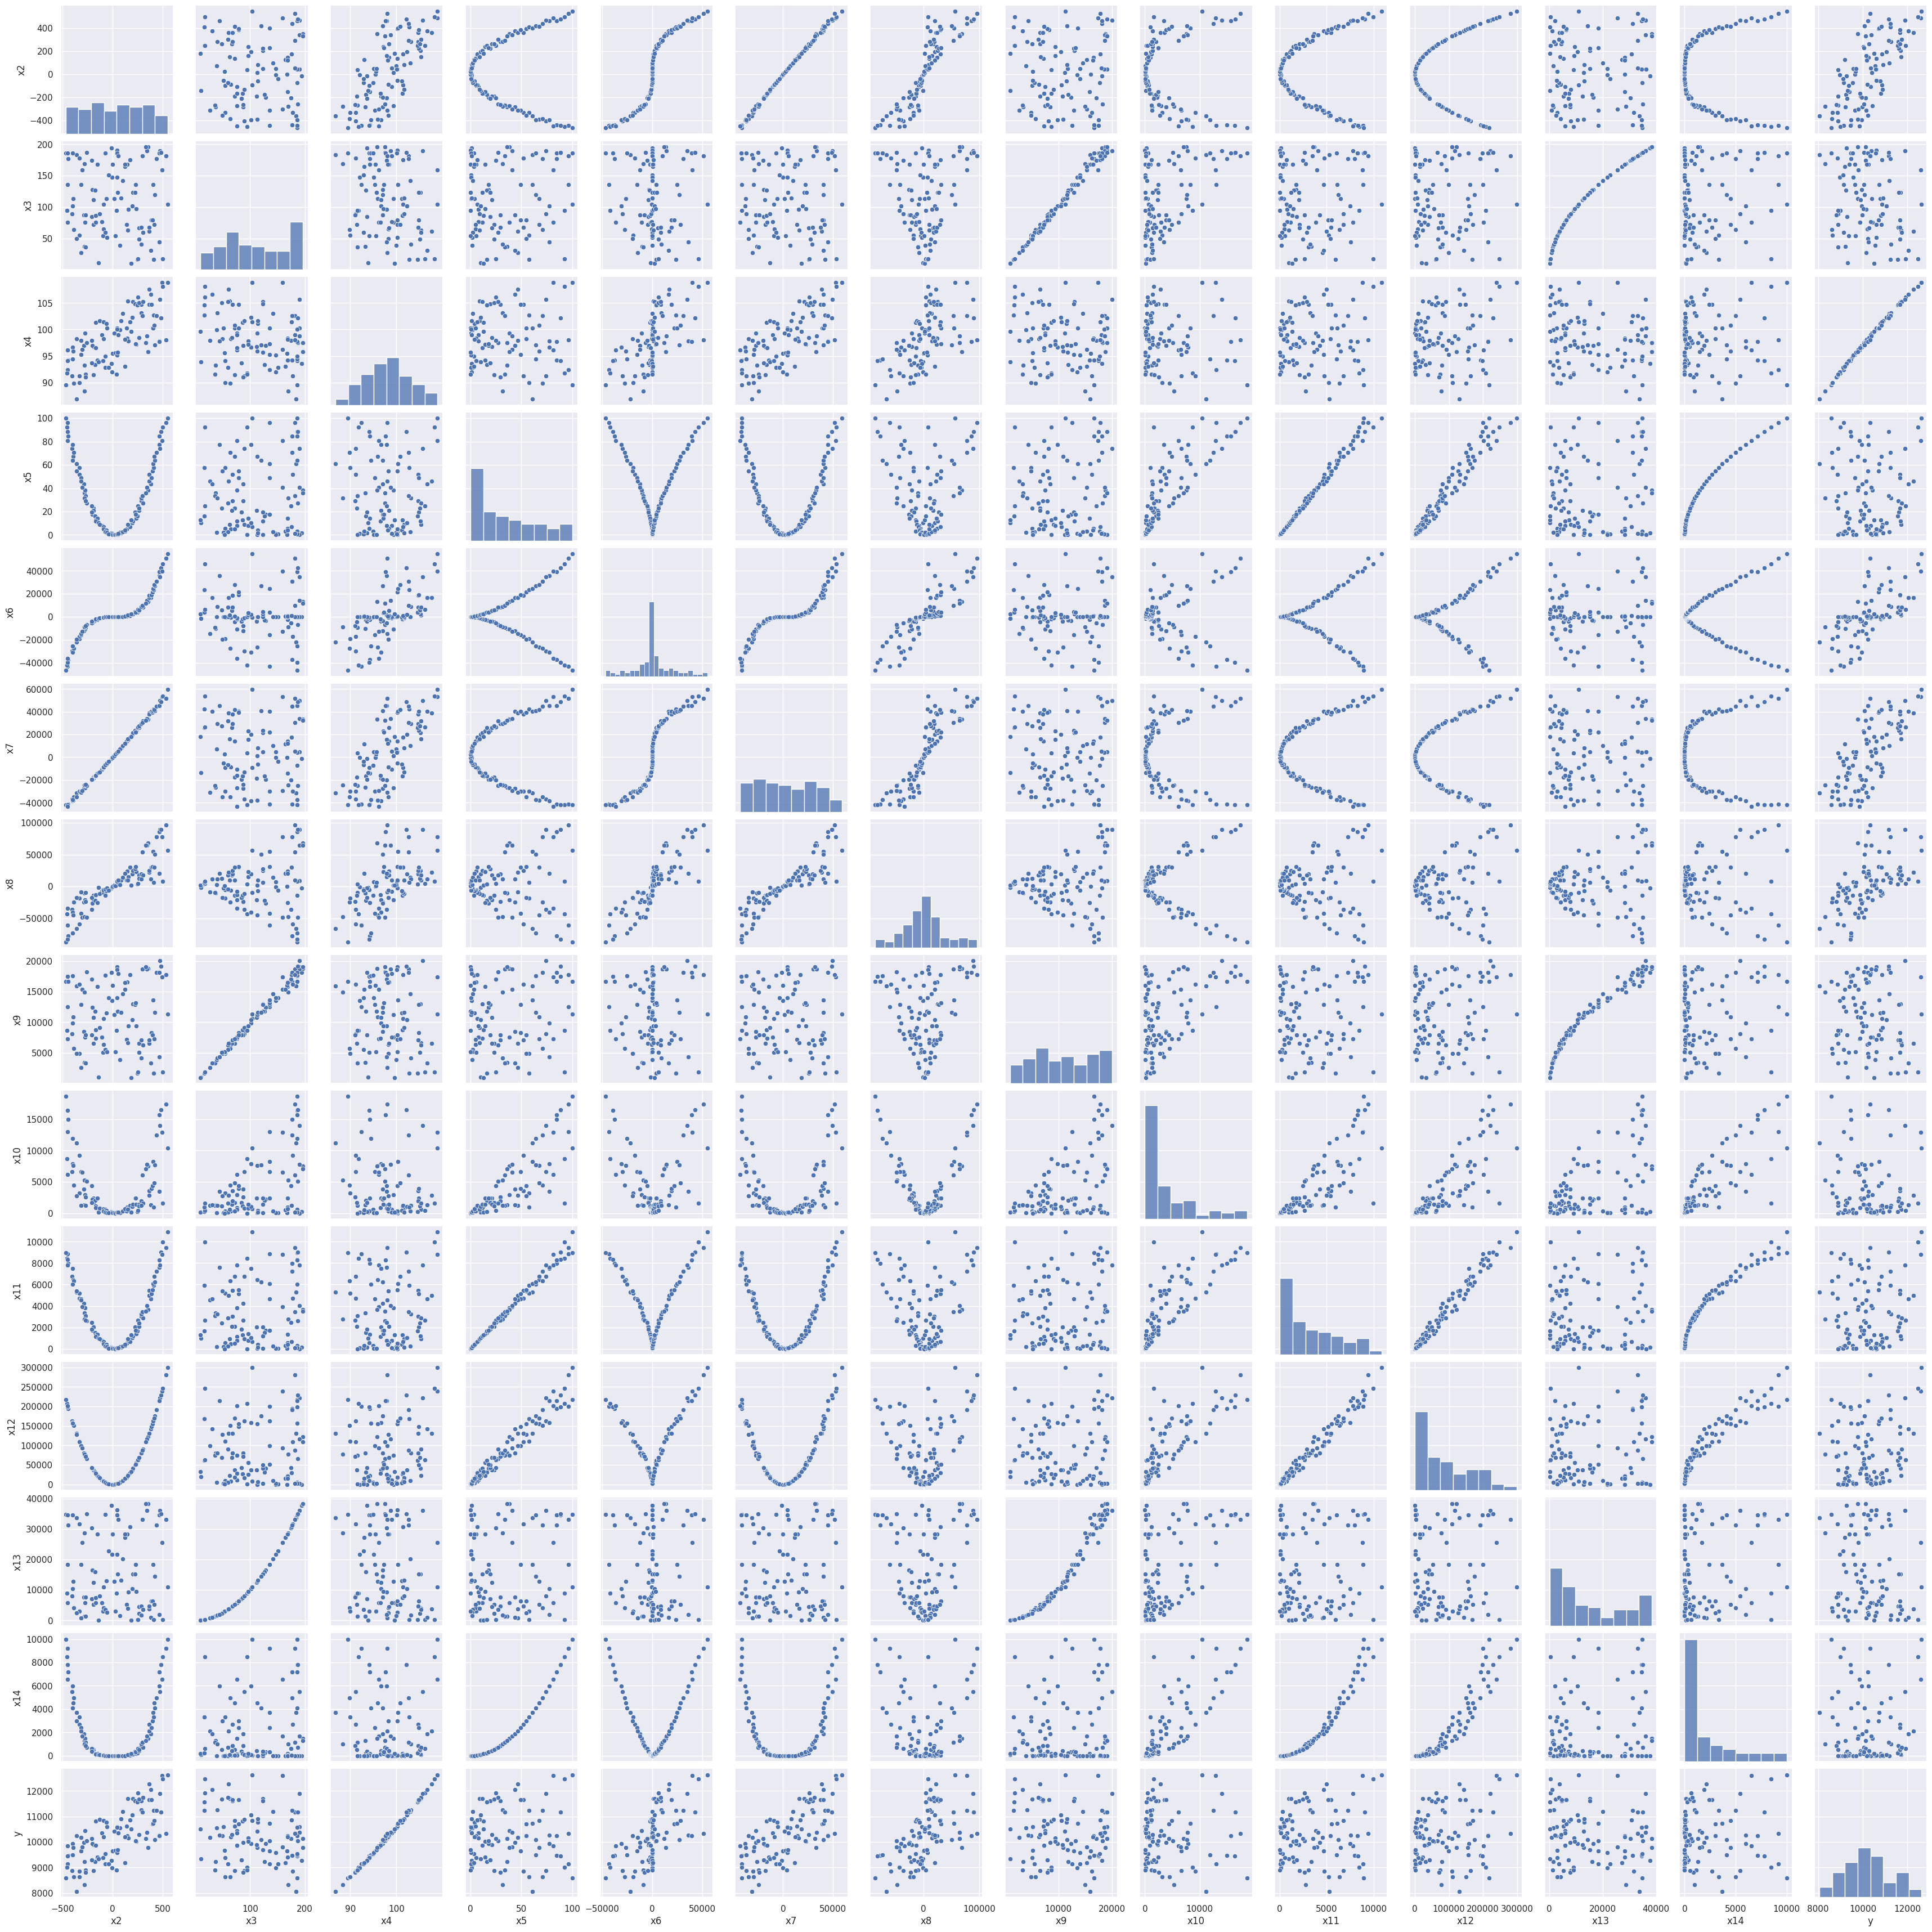

In [351]:
sns.pairplot(X)

In [354]:
X=X.drop(columns=['y'])
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.884e+04
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          4.23e-171
Time:                        10:22:14   Log-Likelihood:                -369.37
No. Observations:                 101   AIC:                             766.7
Df Residuals:                      87   BIC:                             803.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9866.6023     76.374   -129.188      0.0

Sum of squared Errors(SSE) and Root Mean Squared Error(RMSE)

In [355]:
predictions=model.predict(X)
residuals=y-predictions
sse2=np.sum(residuals**2)
rmse2=np.sqrt(sse2/101)
print("Sum of Squared Errors(SSE):",sse2)
print("Root Mean Squared Error(RMSE):",rmse2)

Sum of Squared Errors(SSE): 8879.028866888833
Root Mean Squared Error(RMSE): 9.376096037258227


**Observations 5:**
1. SSE is reduced.
2. RMSE is reduced

# Task 4
Install ‘lazypredict’ package and use the LazyRegressor class to build the regression models.Compare the RMSE reported by all the regression models from LazyRegressor against your OLS losses.Infer the reasons for why different techniques report different performance metrics.


In [356]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=355)

In [357]:
# Initialize LazyRegressor
regressor = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)


# Fit the models on the training data and evaluate them on the test data
models, predictions = regressor.fit(x_train, x_test, y_train, y_test)

# Display the perfomance of the models
print(models)

100%|██████████| 42/42 [00:02<00:00, 18.18it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 357
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 13
[LightGBM] [Info] Start training from score 10290.438037
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

**Observations 6:**
1. RMSE reported by all the regression models using LazyRegressor is in between 12 to 10289.
2. RMSE reported by the task 1 is 26.67698999975848.
2. RMSE reported by the task 3 after performing EDA is 9.376096037258227

**THE END**